<a href="https://colab.research.google.com/github/YujiaLIAO-1/housing/blob/main/module_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

在癌症预测中，希望recall的比例更高（都是已患癌症，结果是预测出患癌症的比例）。precision（预测得癌症，实际得癌症的比例：有人没患病却花钱治疗）

搜索引擎prefer high precision

In [2]:
# import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# read the titanic train dataset
df = pd.read_csv('titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# specify features and target让本节课的预测更简单，因为都是数字、不存在空值之类的
X = df[['SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [7]:
X.isnull().sum()

,0
SibSp,0
Parch,0
Fare,0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.2, random_state=42)
#42:random seed确保每次运行程序时生成相同的随机数序列

In [19]:
X_train.head()

,SibSp,Parch,Fare
331,0,0,28.5000
733,0,0,13.0000
382,0,0,7.9250
704,1,0,7.8542
813,4,2,31.2750


In [22]:
from sklearn.tree import DecisionTreeClassifier
#用于构建决策树分类模型的算法
#DecisionTreeClassifier是scikit-learn库中的一个类，用于创建决策树分类器。
#决策树通过学习数据的特征来预测目标变量。决策树可以处理数值型和分类型特征，适用于分类任务。
#DecisionTreeClassifier提供了多种参数来控制树的生长和复杂性，例如最大深度、最小分裂样本数等
from sklearn.tree import DecisionTreeClassifier
tree_clf1 = DecisionTreeClassifier(criterion='entropy')
tree_clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree_clf3 = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [24]:
len(X_train)

712

In [53]:
from sklearn.model_selection import cross_validate
#cross_validate 交叉验证 没有用上整体的80%的数据
metrics = ['accuracy', 'precision', 'recall', 'f1']

tree_clf1_scores = cross_validate(tree_clf1, X_train, y_train, cv=10, scoring=metrics, return_train_score=True)
tree_clf2_scores = cross_validate(tree_clf2, X_train, y_train, cv=10, scoring=metrics, return_train_score=True)
tree_clf3_scores = cross_validate(tree_clf3, X_train, y_train, cv=10, scoring=metrics, return_train_score=True)

#默认为5。5代表使用5倍交叉验证来评估三个模型的性能（每个模型使用不同倍数的训练数据进行5次训练和测试，总共5次）

In [54]:
tree_clf1_scores#accuracy会是score的平均值

{'fit_time': array([0.0151825 , 0.0164969 , 0.01610422, 0.00520444, 0.01342058,
        0.00496507, 0.0050447 , 0.00508237, 0.00499082, 0.01519346]),
 'score_time': array([0.03597784, 0.02554202, 0.02774286, 0.03191304, 0.05783582,
        0.02455568, 0.02802253, 0.03603125, 0.05651855, 0.05179024]),
 'test_accuracy': array([0.69444444, 0.65277778, 0.64788732, 0.63380282, 0.70422535,
        0.61971831, 0.5915493 , 0.69014085, 0.63380282, 0.61971831]),
 'train_accuracy': array([0.8375    , 0.846875  , 0.8424337 , 0.8424337 , 0.84087363,
        0.8424337 , 0.84555382, 0.83619345, 0.84711388, 0.83931357]),
 'test_precision': array([0.64705882, 0.53846154, 0.53846154, 0.5       , 0.6875    ,
        0.5       , 0.44444444, 0.61904762, 0.52      , 0.5       ]),
 'train_precision': array([0.92546584, 0.88648649, 0.9122807 , 0.8852459 , 0.91616766,
        0.90697674, 0.91764706, 0.91975309, 0.92307692, 0.92073171]),
 'test_recall': array([0.40740741, 0.51851852, 0.26923077, 0.42307692, 0.4

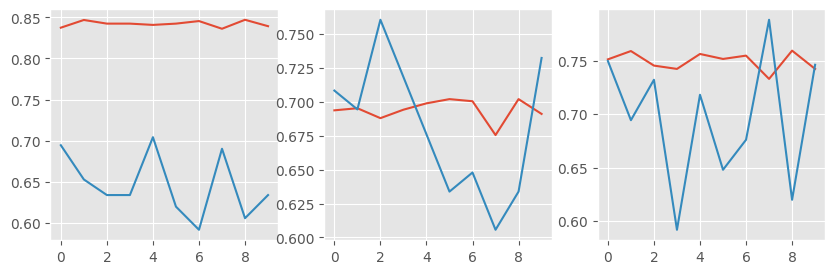

In [44]:
fig, ax = plt.subplots(1,3,figsize=(10,3))
ax[0].plot(tree_clf1_scores['train_score'])
ax[0].plot(tree_clf1_scores['test_score'])

ax[1].plot(tree_clf2_scores['train_score'])
ax[1].plot(tree_clf2_scores['test_score'])

ax[2].plot(tree_clf3_scores['train_score'])
ax[2].plot(tree_clf3_scores['test_score'])



(1)上面的图像分开，是overfitting(blue is 'testing')        

In [45]:
tree_clf2_scores['test_score'].mean(), tree_clf3_scores['test_score'].mean()

(0.681122848200313, 0.6965571205007824)

图像难以分辨，计算test分数的平均值：tree3稍微比 tree2好一点

In [47]:
tree_clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [49]:
y_pred = tree_clf3.predict(X_test)

In [55]:
# this is a prediction
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1])

In [56]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [58]:
accuracy_score(y_test, y_pred)

0.7206703910614525

In [61]:
precision_score(y_test, y_pred)

0.7222222222222222

In [62]:
recall_score(y_test, y_pred)

0.527027027027027

In [64]:
f1_score(y_test, y_pred)

0.609375

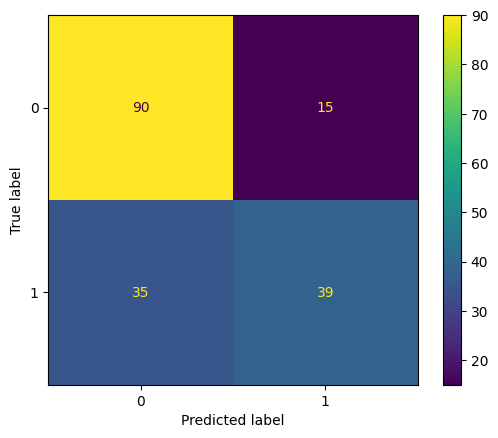

In [65]:
plt.style.use('default') # use default style for confusion matrix plots

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(tree_clf3, X_test, y_test)